# Sentiment Analysis of E-Commerce Product / Hotel Reviews

We will use this publicly available dataset from Kaggle with 568,454 records:

[Amazon Fine Food Reviews on Kaggle](https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews/data)

Reviews from Oct 1999 – Oct 2012:
- 568,454 reviews
- 256,059 users
- 74,258 products
- 260 users with more than 50 reviews

views


In [5]:
import pandas as pd

### Loading Amazon Fine Food Reviews dataset. It has 568454 rows and 10 columns

In [8]:
df= pd.read_csv("Reviews.csv")
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
df.shape

(568454, 10)

### Randomly selecting 50000 reviews from Amazon Fine Food Reviews dataset(df)

In [11]:
sampled_df = df.sample(n=50000, random_state= 42)
sampled_df.to_csv("amazon_reviews_sampled.csv", index= False)


In [12]:
print(sampled_df.shape)

(50000, 10)


In [13]:
sampled_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
165256,165257,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...
231465,231466,B0000BXJIS,A3U62RE5XZDP0G,Marty,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...
427827,427828,B008FHUFAU,AOXC0JQQZGGB6,Kenneth Shevlin,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...
433954,433955,B006BXV14E,A3PWPNZVMNX3PA,rareoopdvds,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin..."
70260,70261,B007I7Z3Z0,A1XNZ7PCE45KK7,Og8ys1,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...


In [19]:
sampled_df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   1
Text                      0
dtype: int64

In [21]:
(sampled_df[sampled_df['Summary'].isna()])


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
178290,178291,B00073IVAQ,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...


In [23]:
duplicates = sampled_df.duplicated()
print(duplicates.sum())
duplicates

0


165256    False
231465    False
427827    False
433954    False
70260     False
          ...  
195700    False
96605     False
151335    False
479997    False
469239    False
Length: 50000, dtype: bool

In [25]:
sampled_df.shape

(50000, 10)

# Preprocessing

Check for missing, duplicate, and formatting issues.

In [28]:
print(sampled_df.isnull().sum())
sampled_df[sampled_df.isnull().any(axis=1)]

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   1
Text                      0
dtype: int64


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
178290,178291,B00073IVAQ,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...


What to do with Summary that is NaN?
Drop rows with missing data or fill with mean or median value

In [31]:
sampled_df.dropna(subset=["Summary"], inplace=True)
sampled_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 49999 entries, 165256 to 469239
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      49999 non-null  int64 
 1   ProductId               49999 non-null  object
 2   UserId                  49999 non-null  object
 3   ProfileName             49999 non-null  object
 4   HelpfulnessNumerator    49999 non-null  int64 
 5   HelpfulnessDenominator  49999 non-null  int64 
 6   Score                   49999 non-null  int64 
 7   Time                    49999 non-null  int64 
 8   Summary                 49999 non-null  object
 9   Text                    49999 non-null  object
dtypes: int64(5), object(5)
memory usage: 4.2+ MB


In [33]:
invalid_score = sampled_df[(sampled_df["Score"] < 1) | (sampled_df["Score"] > 5)]
print(invalid_score)

Empty DataFrame
Columns: [Id, ProductId, UserId, ProfileName, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time, Summary, Text]
Index: []


Check Time is from Oct 1999 - Oct 2012:
- October 1, 1999 at 00:00:00 UTC → 938736000
- November 1, 2012 at 00:00:00 UTC → 1351728000

In [36]:
invalid_date = sampled_df[(sampled_df["Time"] < 938736000) | (sampled_df["Time"] > 1351728000)]
print(invalid_date)

Empty DataFrame
Columns: [Id, ProductId, UserId, ProfileName, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time, Summary, Text]
Index: []


# Naive Bayes Classifier from nltk

In [49]:
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.tokenize import word_tokenize


In [24]:
sampled_df["Score"].mean()
#sampled_df["Score"].median()

4.191443828876578

In [25]:
# Label the reviews: Score == 5 -> positive, Score < 5 -> negative
sampled_df['label'] = sampled_df['Score'].apply(lambda x: 'positive' if x == 5 else 'negative')

train_df = sampled_df.sample(frac=0.8, random_state=42)
print(len(train_df))
test_df = sampled_df.drop(train_df.index)
print(len(test_df))
print(len(train_df[train_df['label']=='positive']))
print(len(train_df[train_df['label']=='negative']))


39999
10000
25737
14262


In [26]:
# Create document lists as (review_text, label) pairs
train_docs = list(zip(train_df['Text'], train_df['label']))
test_docs = list(zip(test_df['Text'], test_df['label']))

# Initialize the SentimentAnalyzer
sentim_analyzer = SentimentAnalyzer()

In [27]:
# Build a list of all words from the training data
all_words = []
for review, _ in train_docs:
    tokens = word_tokenize(review)
    all_words.extend(tokens)

# Create unigram features with a minimum frequency threshold
unigram_feats = sentim_analyzer.unigram_word_feats(all_words, min_freq=5) # testing

# Add the unigram feature extractor to the analyzer using NLTK's utility function
sentim_analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_feats)


In [28]:
# Convert the raw documents into feature sets
training_set = sentim_analyzer.apply_features(train_docs)
test_set = sentim_analyzer.apply_features(test_docs)

In [ ]:
# Train the Naive Bayes Classifier using the training feature set
classifier = NaiveBayesClassifier.train(training_set)

# Evaluate the classifier on the test set
accuracy = nltk.classify.accuracy(classifier, test_set)
print("Accuracy:", accuracy)

# Display the 10 most informative features
classifier.show_most_informative_features(10)

In [ ]:
from sklearn.metrics import classification_report

# Get predicted labels
true_labels = [label for (_, label) in test_docs]  # Actual labels
predicted_labels = [classifier.classify(feats) for (feats, label) in test_set]  # Predicted labels

# Compute precision, recall, f1-score, and support
print(classification_report(true_labels, predicted_labels))


### Try again with 1,2,3 Negative and 4,5 Positive cutoff

In [ ]:
# Label the reviews: Score >= 4 -> positive, Score < 4 -> negative
sampled_df['label'] = sampled_df['Score'].apply(lambda x: 'positive' if x >= 4 else 'negative')

train_df = sampled_df.sample(frac=0.8, random_state=42)
print(len(train_df))
test_df = sampled_df.drop(train_df.index)
print(len(test_df))
print(len(train_df[train_df['label']=='positive']))
print(len(train_df[train_df['label']=='negative']))

In [ ]:
# Create document lists as (review_text, label) pairs
train_docs = list(zip(train_df['Text'], train_df['label']))
test_docs = list(zip(test_df['Text'], test_df['label']))

# Initialize the SentimentAnalyzer
sentim_analyzer = SentimentAnalyzer()

In [ ]:
# Build a list of all words from the training data
all_words = []
for review, _ in train_docs:
    tokens = word_tokenize(review)
    all_words.extend(tokens)

# Create unigram features with a minimum frequency threshold
unigram_feats = sentim_analyzer.unigram_word_feats(all_words, min_freq=6) # testing

# Add the unigram feature extractor to the analyzer using NLTK's utility function
sentim_analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_feats)

In [ ]:
# Convert the raw documents into feature sets
training_set = sentim_analyzer.apply_features(train_docs)
test_set = sentim_analyzer.apply_features(test_docs)

In [ ]:
# Train the Naive Bayes Classifier using the training feature set
classifier = NaiveBayesClassifier.train(training_set)

# Evaluate the classifier on the test set
accuracy = nltk.classify.accuracy(classifier, test_set)
print("Accuracy:", accuracy)

# Display the 10 most informative features
classifier.show_most_informative_features(10)

In [ ]:
# Get predicted labels
true_labels = [label for (_, label) in test_docs]  # Actual labels
predicted_labels = [classifier.classify(feats) for (feats, label) in test_set]  # Predicted labels

# Compute precision, recall, f1-score, and support
print(classification_report(true_labels, predicted_labels))


The NaiveBayesClassifier in NLTK and the MultinomialNB model in scikit-learn are both Naïve Bayes classifiers, but we found out that the two have different algorithms:
https://stackoverflow.com/questions/10407266/scikits-learn-and-nltk-naive-bayes-classifier-performance-highly-different
1. Core Algorithm
- NLTK’s NaiveBayesClassifier: Uses a simple frequency-based approach, where it counts occurrences of features (words) in training data and calculates conditional probabilities using Laplace smoothing.
- scikit-learn’s MultinomialNB: Uses a multinomial distribution model, where it assumes that features (e.g., word counts in text classification) follow a multinomial distribution. This is more suited for discrete feature counts, like term frequency in NLP.
2. Feature Representation
- NLTK’s NaiveBayesClassifier: Works with feature dictionaries, meaning you have to represent input data as a dictionary of features ({'word1': True, 'word2': False, ...}).
- scikit-learn’s MultinomialNB: Works with numerical arrays, usually TF or TF-IDF values, meaning data needs to be vectorized using CountVectorizer or TfidfVectorizer.
3. Implementation & Flexibility
* NLTK’s NaiveBayesClassifier:
    - Simpler and more intuitive for teaching and small NLP projects.
    - Supports categorical feature values (like True/False instead of counts).
    - More transparent; you can inspect probabilities for each feature.
* scikit-learn’s MultinomialNB:
    - More efficient and optimized for large datasets.
    - Works well with sparse matrices (e.g., term frequency vectors).
    - Supports smoothing parameter alpha to handle zero-frequency issues.
4. Performance & Use Cases
* NLTK’s NaiveBayesClassifier:
    - Best for small, educational, or prototype projects.
    - Easier to inspect and explain results.
* scikit-learn’s MultinomialNB:
    - More suitable for large-scale NLP tasks like spam filtering, sentiment analysis, or document classification.
    - Faster due to its optimized implementation using NumPy.

# MulinomialNB model from scikit-learn

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [40]:
sampled_df.iloc[1]['Text']

"My cat loves these treats. If ever I can't find her in the house, I just pop the top and she bolts out of wherever she was hiding to come get a treat. She doesn't like crunchy treats much, so these are perfect for her. I've given her all three flavors and she seems to like them all equally. They do tend to dry out by the time I near the end of the bottle, however. The flip-top lid is very handy. Very nice, inexpensive kitty treats. I have yet to meet a cat that doesn't just love these!"

In [42]:
## Create a copy of sampled_df
df = sampled_df.copy()

### Cutoff Score = 5 as positive and less than 5 as negative

In [45]:
## Combine columns Summary and Text
df['Combined_Text'] = df['Summary'] + " " + df['Text']  # Use both columns


# Convert 'Score' to binary sentiment (1 = Positive, 0 = Negative)
df['Sentiment'] = df['Score'].apply(lambda x: 'positive' if x == 5 else 'negative')

In [51]:
## Download NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kaushikshingne/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kaushikshingne/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [53]:
## Text preprocessing function
def clean_text(text):
    text = text.lower()
    text =re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)  
    text = ''.join([word for word in word_tokenize(text) if word not in stop_words])
    return text


In [55]:
# Apply preprocessing to combined text
df['Combined_Text']=  df['Combined_Text'].apply(clean_text)

In [56]:

# Split the original DataFrame into training and testing sets
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Now split out the text and sentiment labels for the test set
X_train_text = df_train['Combined_Text']
X_test_text = df_test['Combined_Text']
y_train = df_train['Sentiment']
y_test = df_test['Sentiment']


# Then, transform the text using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

# Train Naïve Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


MultinomialNB()

In [57]:
import numpy as np
import pandas as pd

# Make predictions
y_pred = nb_model.predict(X_test)


# Find misclassified indices
misclassified_indices = np.where(y_pred != y_test)[0]

# Create a DataFrame of misclassified reviews
misclassified_reviews = pd.DataFrame({
    "Review": X_test_text.iloc[misclassified_indices],
    "Actual": y_test.iloc[misclassified_indices],
    "Predicted": y_pred[misclassified_indices]
})

print(misclassified_reviews.head(10))


                                                   Review    Actual Predicted
565044  greattastingcerealpurchasedcerealwantedgetsome...  negative  positive
111399  easymakeveganproductsexceptallergensniceproduc...  negative  positive
161245  dogslovegotthinkingchubbylildogmightbenifittre...  negative  positive
358689  stepwrongdirectiondrinkingcoconutwateryearstri...  negative  positive
6622    niceblendsweetoverlycarbonatedbestdescribedgoo...  negative  positive
507098  nutthinspricehappyshipmentnutthinsnoticeprices...  negative  positive
465946  runtsgotorderedgoodcondition4starsmanynannasgo...  negative  positive
377996  greattastemeasureweightvolumeimpressedtastepea...  negative  positive
424334  greattastinghotsaucehotsaucegreatflavorrightam...  negative  positive
256506  smellsmuchbettertasteslovepomegranateflavorlov...  negative  positive


In [58]:
# Model Evaluation
# accuracy measures the overall correctness of the model(correct_pred / total_pred)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

#Classification report
#Precision:How many of the predicted positives were actually positive? (Lower False Positives)
#Recall :How many of the actual positives were correctly identified? (Lower False Negatives)
#F1score: The harmonic mean of precision & recall (a balance between the two)
#Support:The number of actual samples in that class

print('Classification report:\n',classification_report(y_test, y_pred))

Accuracy: 0.6554
Classification report:
               precision    recall  f1-score   support

    negative       1.00      0.03      0.06      3562
    positive       0.65      1.00      0.79      6438

    accuracy                           0.66     10000
   macro avg       0.83      0.52      0.43     10000
weighted avg       0.78      0.66      0.53     10000



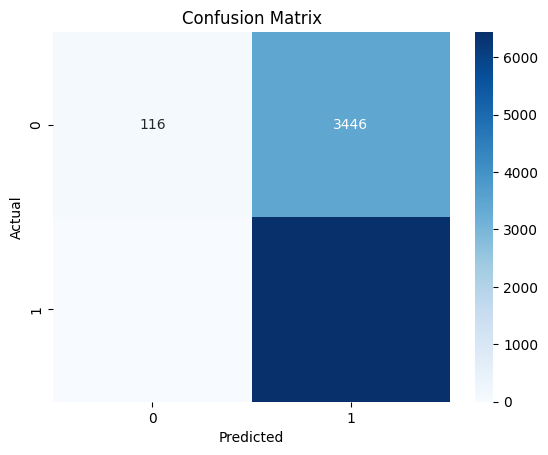

In [63]:
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Score >=4 as positive cutoff and score < 4 as negative

In [66]:
## Combine columns Summary and Text
df['Combined_Text'] = df['Summary'] + " " + df['Text']  # Use both columns

# Convert 'Score' to binary sentiment (1 = Positive, 0 = Negative)
df['Sentiment'] = df['Score'].apply(lambda x: 'positive' if x >=4 else 'negative')

In [68]:
## Download NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kaushikshingne/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kaushikshingne/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [70]:
## Text preprocessing function
def clean_text(text):
    text = text.lower()
    text =re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)  
    text = ''.join([word for word in word_tokenize(text) if word not in stop_words])
    return text



In [72]:
# Apply preprocessing to combined text
df['Combined_Text']=  df['Combined_Text'].apply(clean_text)

In [73]:

# Split the original DataFrame into training and testing sets
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Now split out the text and sentiment labels for the test set
X_train_text = df_train['Combined_Text']
X_test_text = df_test['Combined_Text']
y_train = df_train['Sentiment']
y_test = df_test['Sentiment']

# Then, transform the text using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

# Train Naïve Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


MultinomialNB()

In [74]:
import numpy as np
import pandas as pd

# Make predictions
y_pred = nb_model.predict(X_test)


# Find misclassified indices
misclassified_indices = np.where(y_pred != y_test)[0]

# Create a DataFrame of misclassified reviews
misclassified_reviews = pd.DataFrame({
    "Review": X_test_text.iloc[misclassified_indices],
    "Actual": y_test.iloc[misclassified_indices],
    "Predicted": y_pred[misclassified_indices]
})

print(misclassified_reviews.head(10))


                                                   Review    Actual Predicted
358689  stepwrongdirectiondrinkingcoconutwateryearstri...  negative  positive
27826   ohgashorriblehorriblegasletgetonethingstraight...  negative  positive
256506  smellsmuchbettertasteslovepomegranateflavorlov...  negative  positive
337760  secondorderhorriblefirstordergreatlookedexactl...  negative  positive
88899   carefulreviewsimplyheadsmaythinkcoconutoilcook...  negative  positive
132468  received6montholdproductuseketchuppacketslunch...  negative  positive
548061  usinghairoilserumconfusednameproductrefersscal...  negative  positive
216323  teeccinocoffeesmellsbadtastesbadcoffeetastesba...  negative  positive
164643  bacongumballsstoplaughingstorebuysmellkindalik...  negative  positive
327504  bpacanspointputtingorganicfoodtoxicgetearthbes...  negative  positive


In [75]:
# Model Evaluation
# accuracy measures the overall correctness of the model(correct_pred / total_pred)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

#Classification report
#Precision:How many of the predicted positives were actually positive? (Lower False Positives)
#Recall :How many of the actual positives were correctly identified? (Lower False Negatives)
#F1score: The harmonic mean of precision & recall (a balance between the two)
#Support:The number of actual samples in that class

print('Classification report:\n',classification_report(y_test, y_pred))

Accuracy: 0.7911
Classification report:
               precision    recall  f1-score   support

    negative       1.00      0.03      0.06      2150
    positive       0.79      1.00      0.88      7850

    accuracy                           0.79     10000
   macro avg       0.89      0.51      0.47     10000
weighted avg       0.84      0.79      0.70     10000



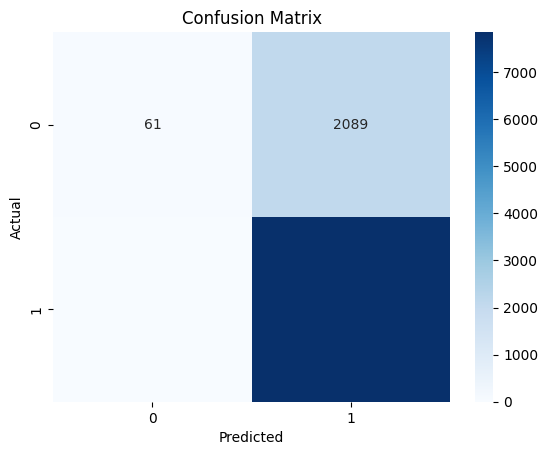

In [76]:
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()